In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['sample_submission.csv', 'train', 'test', 'train.csv']


In [2]:
# Libraries
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

Using TensorFlow backend.


In [3]:
train_d = "../input/train/train/"
test_d = "../input/test/test/"
train_labels=pd.read_csv("../input/train.csv")

In [4]:
train_labels.head(10)

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1
5,0017c3c18ddd57a2ea6f9848c79d83d2.jpg,1
6,002134abf28af54575c18741b89dd2a4.jpg,0
7,0024320f43bdd490562246435af4f90b.jpg,0
8,002930423b9840e67e5a54afd4768a1e.jpg,1
9,00351838ebf6dff6e53056e00a1e307c.jpg,1


In [5]:
print(train_labels.shape)

(17500, 2)


In [6]:
print(train_labels['has_cactus'].value_counts())

1    13136
0     4364
Name: has_cactus, dtype: int64


In [7]:
label=[]
image_feature = []
image_id=train_labels['id']
for i in image_id:
    img=image.load_img(train_d+i, target_size=(32,32,1), grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    image_feature.append(img)
    label.append(train_labels[train_labels['id'] == i]['has_cactus'].values[0])

In [8]:
print("tag length:",len(label))

tag length: 17500


In [9]:
print("Total Images: ",len(image_feature))

Total Images:  17500


In [10]:
tuple_list=list(zip(image_feature,label))
df = pd.DataFrame(tuple_list, columns = ['img', 'label'])
print(df.shape)

(17500, 2)


In [11]:
X = np.array(image_feature)
y=pd.get_dummies(df['label']).values #Convert categorical variable into dummy/indicator variables

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [13]:
print("Train Images:",X_train.shape[0])

Train Images: 14000


In [14]:
print("Test Images:",X_test.shape[0])

Test Images: 3500


In [15]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [16]:
history = model.fit(X_train, y_train, epochs=20) 
#The number of epochs is the number of times the model will cycle through the data.

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
14000/14000 [==============================] - 7s 507us/step - loss: 0.2347 - acc: 0.9039
Epoch 2/20
14000/14000 [==============================] - 2s 141us/step - loss: 0.1429 - acc: 0.9481
Epoch 3/20
14000/14000 [==============================] - 2s 153us/step - loss: 0.1255 - acc: 0.9536
Epoch 4/20
14000/14000 [==============================] - 2s 153us/step - loss: 0.1128 - acc: 0.9587
Epoch 5/20
14000/14000 [==============================] - 2s 154us/step - loss: 0.0932 - acc: 0.9654
Epoch 6/20
14000/14000 [==============================] - 2s 155us/step - loss: 0.0855 - acc: 0.9685
Epoch 7/20
14000/14000 [==============================] - 2s 148us/step - loss: 0.0804 - acc: 0.9729
Epoch 8/20
14000/14000 [==============================] - 2s 137us/step - loss: 0.0758 - acc: 0.9718
Epoch 9/20
14000/14000 [==============================] - 2s 137us/step - loss: 0.0657 - acc: 0.9756
Epoch 10/20
14000/14000 [==================

In [17]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:"+"%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Test Accuracy:acc: 98.54%


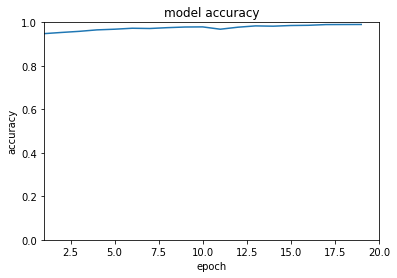

In [18]:
# Accuracy for our model
plt.ylim(0,1)
plt.xlim(1,20)
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

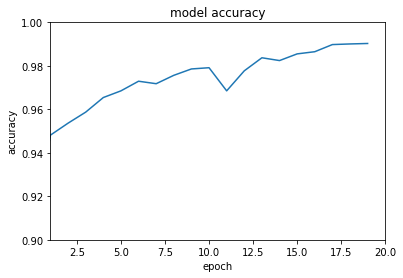

In [19]:
# Accuracy for our model
plt.ylim(0.90,1)
plt.xlim(1,20)
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

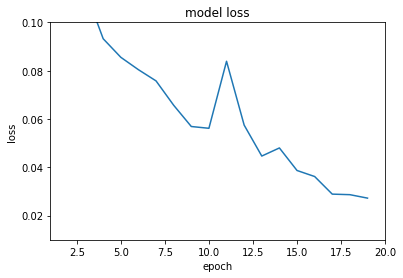

In [20]:
# Loss for our model
plt.ylim(0.01,0.1)
plt.xlim(1,20)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [21]:
submission=pd.read_csv("../input/sample_submission.csv")
image_feature = []
image_id=submission['id']

for i in image_id:
    img=cv2.imread(test_d + i)
    img = image.img_to_array(img)
    img = img/255
    image_feature.append(img)
    
print("Total Images: ",len(image_feature))

Total Images:  4000


In [22]:
Y = np.array(image_feature)
y_pred=model.predict_classes(Y)
print("Predicted classes:",y_pred)

Predicted classes: [1 1 0 ... 1 1 1]


In [23]:
sub_data=pd.DataFrame({'id':image_id })
sub_data['has_cactus']=y_pred
sub_data.to_csv("submissions.csv",index=False)